In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Prepare data sets
def get_inputs(dim: int = 2):
    if dim == 1:
        return np.array([[0], [1]])
    array = get_inputs(dim-1)
    zeroes = np.zeros((2**(dim-1), 1))
    ones = np.ones((2**(dim-1), 1))
    arr1 = np.concatenate((zeroes, array), axis=1)
    arr2 = np.concatenate((ones, array), axis=1)

    return np.concatenate((arr1, arr2), axis=0)

def palindrome_output(array : np.ndarray):
    m, n = array.shape
    output = np.zeros((m, 1))
    for i in range(m):
        x = array[i]
        valid = True
        for j in range(n): 
            if x[j]!=x[n-1-j]:
                valid = False
                break
        output[i][0] = 1 if valid else 0
    
    return output

def majority_output(array : np.ndarray):
    m, n = array.shape
    output = np.array((np.sum(array, axis=1) > n/2), dtype=np.int32)
    return output.reshape((m, 1))

def even_parity_output(array : np.ndarray):
    m, n = array.shape
    output = np.array((np.sum(array, axis=1)%2==0), dtype=np.int32)
    return output.reshape((m, 1))


# XOR data set 
input_XOR = get_inputs(2)
output_XOR = np.array([[0], [1], [1], [0]])

# Palindrome data set
input_palindrome_4 = get_inputs(4)
output_palindrome_4 = palindrome_output(input_palindrome_4)

input_palindrome_5 = get_inputs(5)
output_palindrome_5 = palindrome_output(input_palindrome_5)

# Majority function data set
input_majority_4 = get_inputs(4)
output_majority_4 = majority_output(input_majority_4)

input_majority_5 = get_inputs(5)
output_majority_5 = majority_output(input_majority_5)

# Even parity function data set
input_parity_4 = get_inputs(4)
output_parity_4 = even_parity_output(input_parity_4)

input_parity_5 = get_inputs(5)
output_parity_5 = even_parity_output(input_parity_5)

# Number of iterations in training
epochs = 10000


In [3]:
# Neural Network
# Simple neural network with no hidden layers and one output

class NeuralNetwork:
    def __init__(self, input_size):
        self.input_size = input_size
        self.weights = np.random.randn(self.input_size, 1)
        self.bias = np.random.randn(1)[0]
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def sigmoid_derivative(self, x):
        sig = self.sigmoid(x)
        return sig*(1-sig) 
    
    def MSE_loss(self, y, y_pred):
        return np.mean((y-y_pred)**2)
    
    def forward_pass(self, X):
        # X is the input.
        # X Dimension = m*input_size
        # weights Dimension = input_size*1 
        Z =  np.dot(X, self.weights) + self.bias # dim m*1
        A = self.sigmoid(Z)

        return  Z, A
    
    def output(self, x):
        x.reshape(1, x.shape[0])
        Z, A = self.forward_pass(x)
        return A[0]
    
    def get_gradients(self, X, y_pred, y):
        # DataSet size
        m, _= y_pred.shape
        dy = 2*(y-y_pred)/m # m*1 
        dZ = dy*y*(1-y)     # m*1

        weights_gradient = np.dot(X.T, dZ)
        bias_gradient = np.sum(dZ, axis=0)[0]

        return weights_gradient, bias_gradient

    def Network_Train(self, X, y_pred, learning_rate, epochs, sep=100):
        
        loss_values = []
        for epoch in range(epochs):
            Z, y = self.forward_pass(X)
            loss = self.MSE_loss(y, y_pred)

            if epoch%sep == 0 : 
                loss_values.append(loss)
            
            weights_gradient, bias_gradient = self.get_gradients(X, y_pred, y) 

            # Update  weights, biases
            self.weights-=weights_gradient*learning_rate
            self.bias-=bias_gradient*learning_rate
        
        return loss_values
    
    def draw_graph(self, loss_values, epochs, sep=100):
        x_values = np.linspace(0, epochs, int(epochs/sep))
        plt.plot(x_values, loss_values)
        plt.show()
    
    


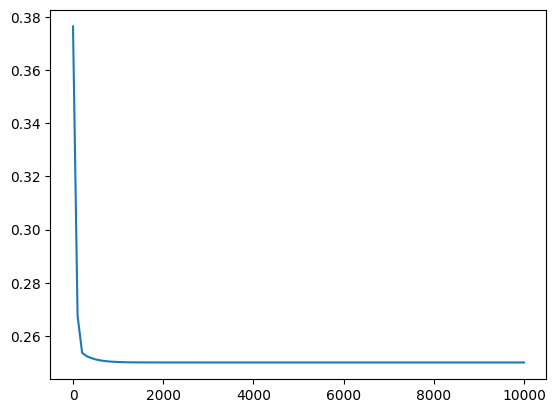

In [4]:

# XOR function training
XOR_function = NeuralNetwork(2)
loss_XOR = XOR_function.Network_Train(input_XOR, output_XOR, 0.1, epochs)
XOR_function.draw_graph(loss_XOR, epochs)


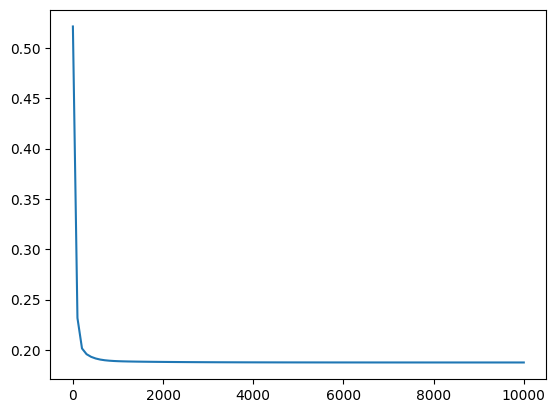

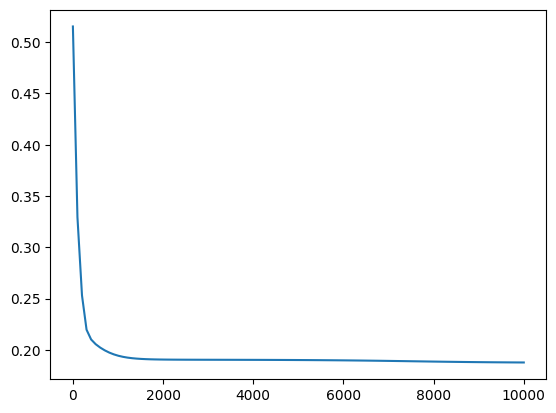

In [5]:
# palindrome function testing
Palindrome_function_4 = NeuralNetwork(4)
loss_pal_4 = Palindrome_function_4.Network_Train(input_palindrome_4, output_palindrome_4, 0.1, epochs)
Palindrome_function_4.draw_graph(loss_pal_4, epochs)

Palindrome_function_5 = NeuralNetwork(5)
loss_pal_5 = Palindrome_function_5.Network_Train(input_palindrome_5, output_palindrome_5, 0.1, epochs)
Palindrome_function_5.draw_graph(loss_pal_5, epochs)


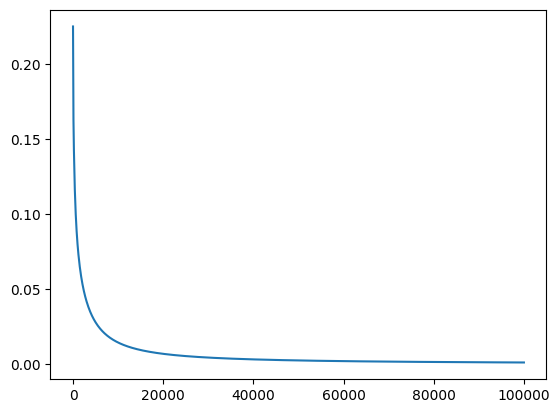

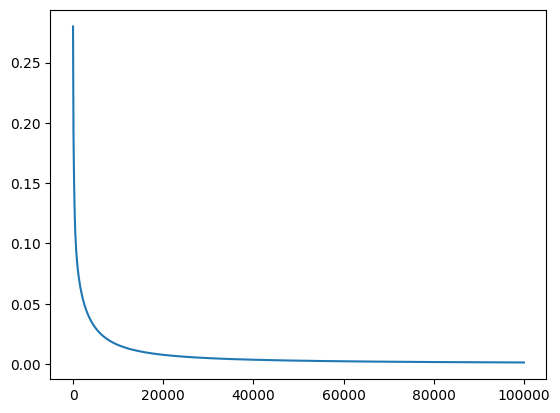

In [6]:
# majority function training
Majority_function_4 = NeuralNetwork(4)
loss_majority_4 = Majority_function_4.Network_Train(input_majority_4, output_majority_4, 0.1, 10*epochs)
Majority_function_4.draw_graph(loss_majority_4, 10*epochs)

Majority_function_5 = NeuralNetwork(5)
loss_majority_5 = Majority_function_5.Network_Train(input_majority_5, output_majority_5, 0.1, 10*epochs)
Majority_function_5.draw_graph(loss_majority_5, 10*epochs)

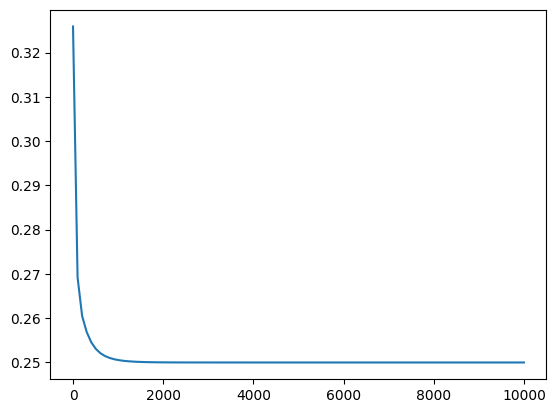

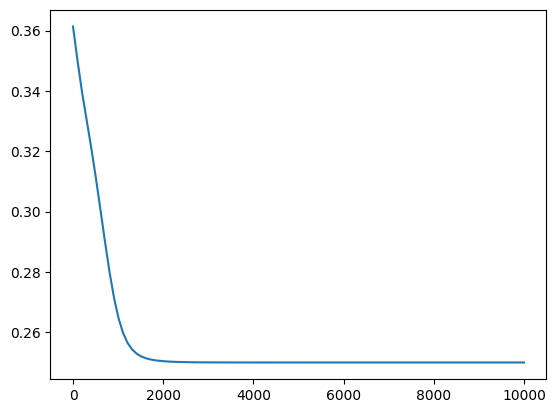

In [7]:
# parity function training
parity_function_4 = NeuralNetwork(4)
loss_parity_4 = parity_function_4.Network_Train(input_parity_4, output_parity_4, 0.1, epochs)
parity_function_4.draw_graph(loss_parity_4, epochs)

parity_function_5 = NeuralNetwork(5)
loss_parity_5 = parity_function_5.Network_Train(input_parity_5, output_parity_5, 0.1, epochs)
parity_function_5.draw_graph(loss_parity_5, epochs)
